In [179]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from itertools import chain

from sklearn.metrics import accuracy_score

In [180]:
dfClean = pd.read_csv('data/compiledData/dfCleanMortes.csv')

dfClean['SEXO_PESSOA_R'] = dfClean['SEXO_PESSOA'].str.strip().str.lower().replace('indefinido',np.nan)
dfClean['IDADE_PESSOA_R'] = dfClean['IDADE_PESSOA'].replace('NÃO INFORMADO',np.nan).astype(float)
dfClean.COR_PELE = dfClean.COR_PELE.str.strip().replace({'Ignorada':'Ignorada/Não Informada','Não informada':'Ignorada/Não Informada'})


dfClean.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,LAT_LONG,RESPONSE_GEOLOCATOR,GEOLOCATOR_ADDRESS,GEOLOCATOR_NEIGHBORHOOD,GEOLOCATOR_POSTCODE,ZONE_FROM_POSTCODE,BO_ANO,NUM_VITIMAS_CRIME,SEXO_PESSOA_R,IDADE_PESSOA_R
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,08º D.P. BRAS,...,"-23.5462154481364,-46.631733309032","Rua Vinte e Cinco de Março, Sé, São Paulo, Reg...","{'road': 'Rua Vinte e Cinco de Março', 'suburb...",SÉ,01015-020,Centro,3-2019,1,masculino,62.0
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,01º D.P. SE,...,"-23.5546896292896,-46.6296510483604","Vila Suíça, Sé, São Paulo, Região Imediata de ...","{'road': 'Vila Suíça', 'suburb': 'Sé', 'city':...",SÉ,01514-020,Centro,372-2019,1,masculino,44.0
2,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,78º D.P. JARDINS,...,"-23.560415289045,-46.6337071030673","Rua São Joaquim, Liberdade, São Paulo, Região ...","{'road': 'Rua São Joaquim', 'suburb': 'Liberda...",LIBERDADE,01511-001,Centro,534-2019,2,masculino,40.0
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,78º D.P. JARDINS,...,"-23.5629637062019,-46.6455014429631","1627, Avenida Brigadeiro Luís Antônio, Bela Vi...","{'house_number': '1627', 'road': 'Avenida Brig...",BELA VISTA,01318-002,Centro,624-2019,2,feminino,57.0
4,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,95º D.P. HELIÓPOLIS,...,"-23.6075347234928,-46.595687674394","Rua Cônego Xavier, Vila Heliópolis, Sacomã, Sã...","{'road': 'Rua Cônego Xavier', 'suburb': 'Vila ...",VILA HELIÓPOLIS,04232-000,Zona Sul,259-2019,1,masculino,25.0


In [181]:
dfTree = dfClean[['SEXO_PESSOA_R', 'IDADE_PESSOA_R', 'COR_PELE','ZONE_FROM_POSTCODE','CRIME']].dropna()

In [182]:
print(dfTree.shape)

(1616, 5)


# Testando com todas como categórica

In [183]:
X = dfTree[['SEXO_PESSOA_R', 'IDADE_PESSOA_R', 'COR_PELE','ZONE_FROM_POSTCODE']]
y = dfTree.CRIME

In [184]:
encoder = OneHotEncoder()
X_Encoded = encoder.fit_transform(X)

In [185]:
print(X.shape)
print(X_Encoded.shape)

(1616, 4)
(1616, 83)


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, test_size=0.30, random_state=17) 

In [187]:
DT = DecisionTreeClassifier(max_depth=3, random_state = 17)

In [188]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [189]:

y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)


In [194]:
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de acertos sobre o set de treino:', train_accuracy)
print('% de acertos sobre o set de validação:',test_accuracy)

% de acertos sobre o set de treino: 0.8169761273209549
% de acertos sobre o set de validação: 0.7958762886597938


In [191]:
categories = list(chain.from_iterable(encoder.categories_))
len(categories)

83

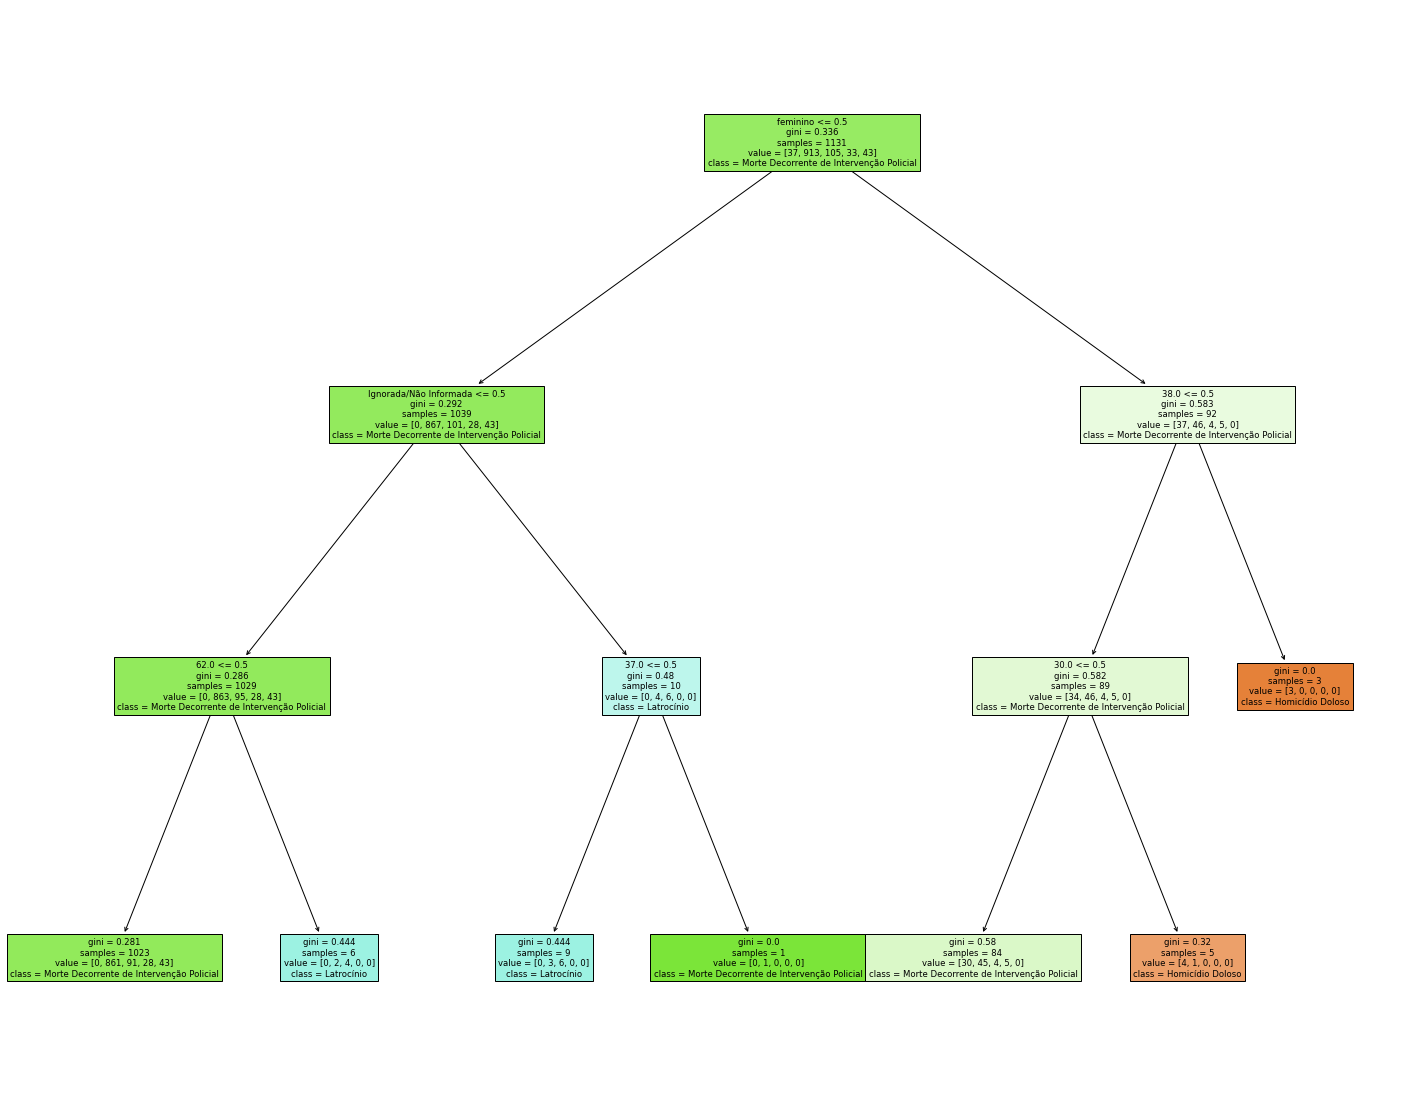

In [192]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, 
                   feature_names=categories,  
                   class_names=dfClean.CRIME.unique(),
                   filled=True)

# Idade como numérica

In [199]:
dfDummies = pd.get_dummies(dfTree,columns=['SEXO_PESSOA_R', 'COR_PELE','ZONE_FROM_POSTCODE'])
dfDummies

,IDADE_PESSOA_R,CRIME,SEXO_PESSOA_R_feminino,SEXO_PESSOA_R_masculino,COR_PELE_Amarela,COR_PELE_Branca,COR_PELE_Ignorada/Não Informada,COR_PELE_Parda,COR_PELE_Preta,COR_PELE_Vermelha,ZONE_FROM_POSTCODE_-,ZONE_FROM_POSTCODE_Centro,ZONE_FROM_POSTCODE_Zona Leste,ZONE_FROM_POSTCODE_Zona Norte,ZONE_FROM_POSTCODE_Zona Oeste,ZONE_FROM_POSTCODE_Zona Sul
0,62.0,Homicídio Doloso,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,44.0,Homicídio Doloso,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,40.0,Homicídio Doloso,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,57.0,Homicídio Doloso,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,25.0,Homicídio Doloso,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,29.0,Feminicidio,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1634,23.0,Feminicidio,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1635,39.0,Feminicidio,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1636,30.0,Feminicidio,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [200]:
y2 = dfDummies.CRIME
X2 = dfDummies.drop(['CRIME'],axis=1)

In [201]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=17) 

In [202]:
DT2 = DecisionTreeClassifier(max_depth=3, random_state = 17)

In [203]:
DT2.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [204]:

y_train_pred2 = DT2.predict(X_train2)
y_test_pred2 = DT2.predict(X_test2)


In [205]:
train_accuracy2 = accuracy_score(y_train2, y_train_pred2)

test_accuracy2 = accuracy_score(y_test2, y_test_pred2)

print('% de acertos sobre o set de treino:', train_accuracy2)
print('% de acertos sobre o set de validação:',test_accuracy2)

% de acertos sobre o set de treino: 0.8116710875331565
% de acertos sobre o set de validação: 0.7628865979381443


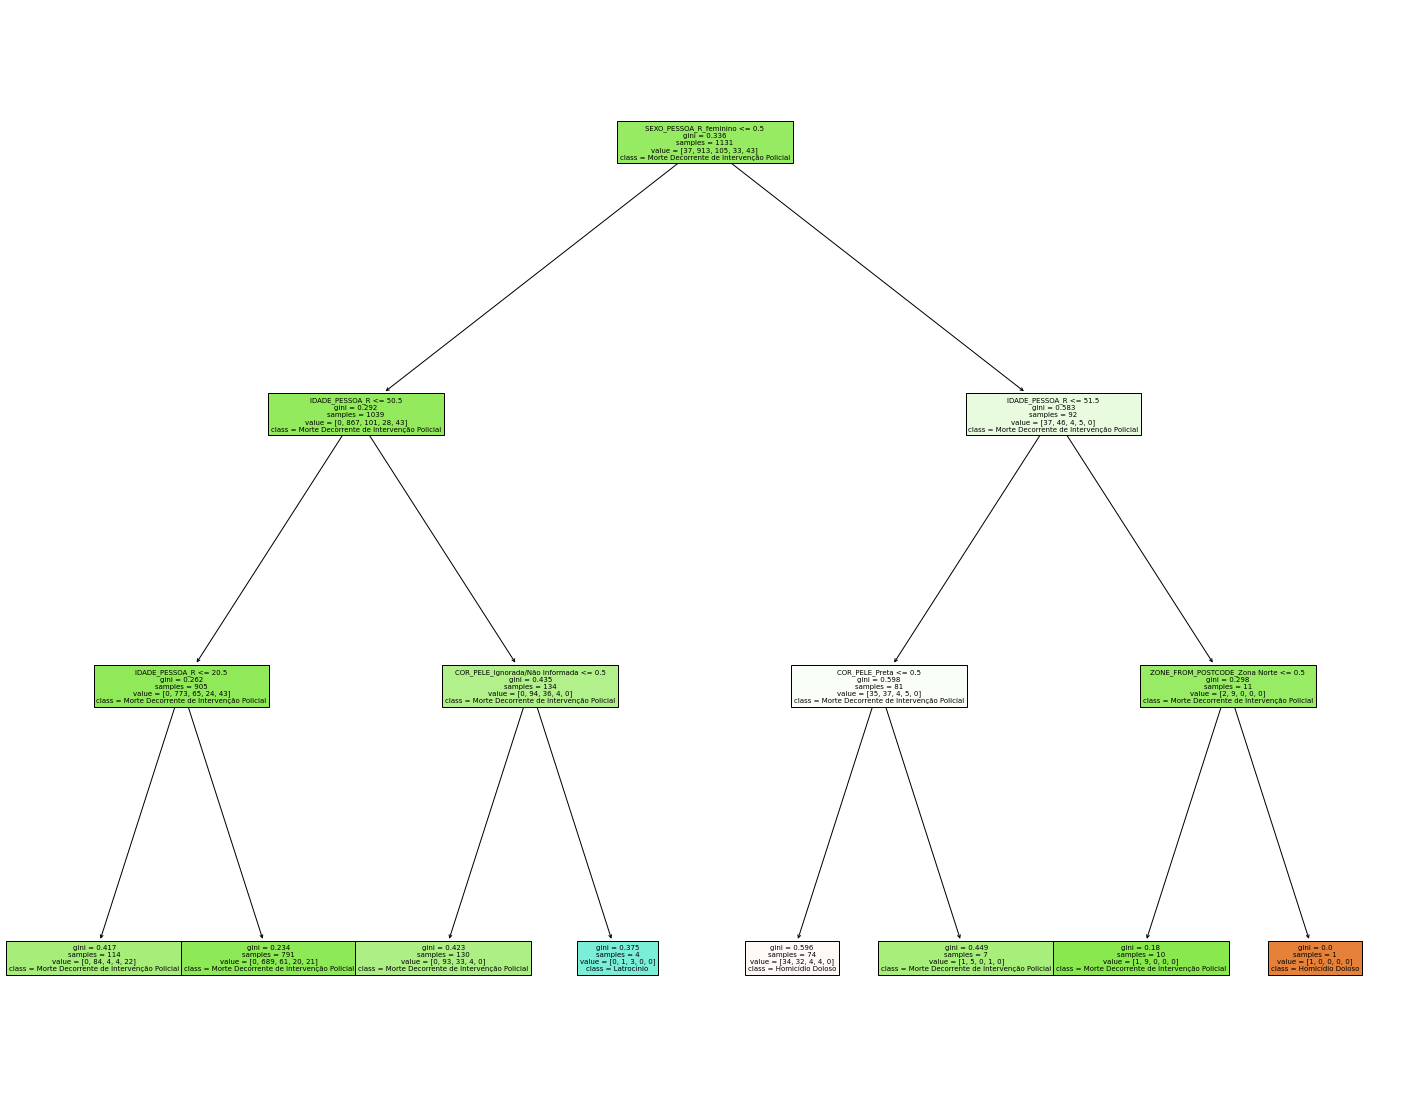

In [212]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT2, 
                   feature_names=X2.columns,  
                   class_names=y2.unique(),
                   filled=True)